# **Import Libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif,SelectKBest,f_classif
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

# **Load Dataset**

In [6]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Univaraite Analysis**

In [9]:
#Categorical Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


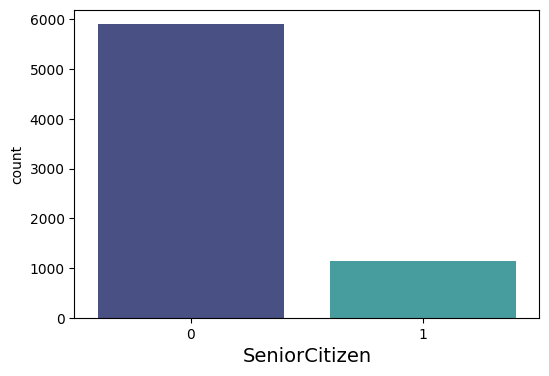

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen' , data=df ,palette='mako')
plt.xlabel('SeniorCitizen', fontsize=14)
plt.show()

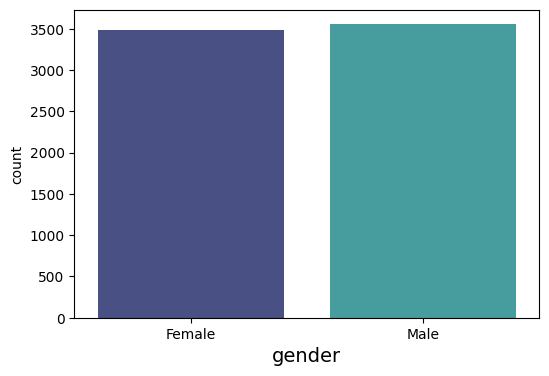

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender' , data=df ,palette='mako')
plt.xlabel('gender', fontsize=14)
plt.show()

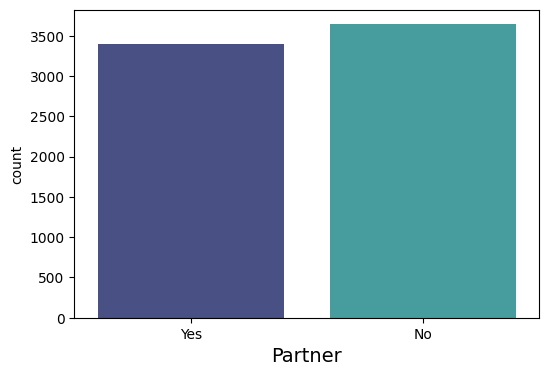

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Partner' , data=df ,palette='mako')
plt.xlabel('Partner', fontsize=14)
plt.show()

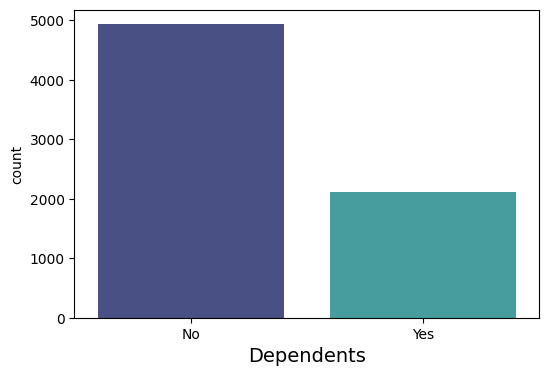

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Dependents' , data=df ,palette='mako')
plt.xlabel('Dependents', fontsize=14)
plt.show()

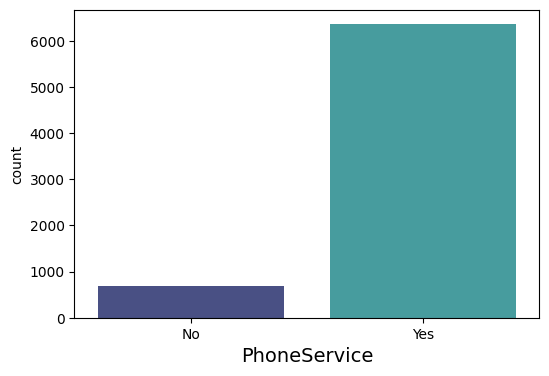

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='PhoneService' , data=df ,palette='mako')
plt.xlabel('PhoneService', fontsize=14)
plt.show()

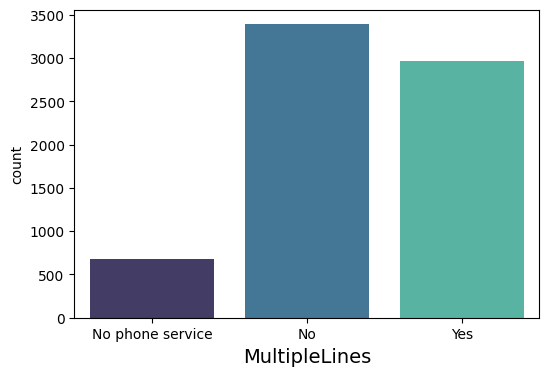

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='MultipleLines' , data=df ,palette='mako')
plt.xlabel('MultipleLines', fontsize=14)
plt.show()

In [16]:
df["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [17]:
df["MultipleLines"].replace("No phone service", "No", inplace=True)

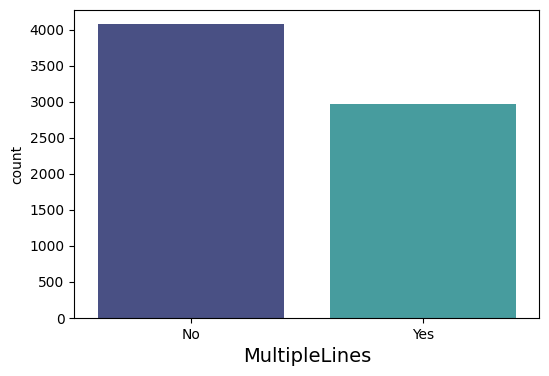

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='MultipleLines' , data=df ,palette='mako')
plt.xlabel('MultipleLines', fontsize=14)
plt.show()

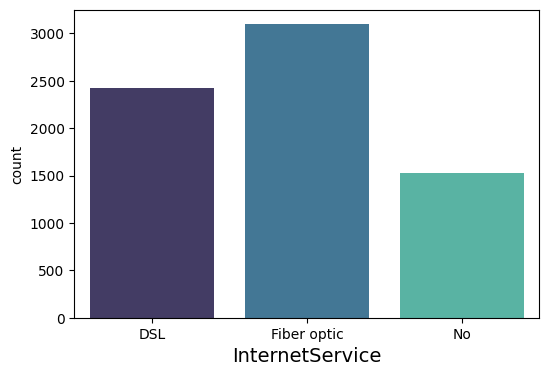

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService' , data=df ,palette='mako')
plt.xlabel('InternetService', fontsize=14)
plt.show()

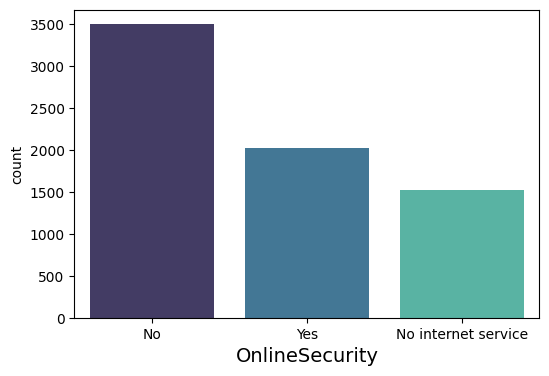

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='OnlineSecurity' , data=df ,palette='mako')
plt.xlabel('OnlineSecurity', fontsize=14)
plt.show()

In [21]:
df["OnlineSecurity"].replace("No internet service", "No", inplace=True)

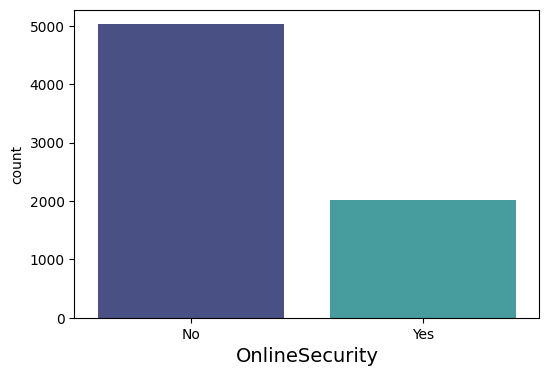

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='OnlineSecurity' , data=df ,palette='mako')
plt.xlabel('OnlineSecurity', fontsize=14)
plt.show()

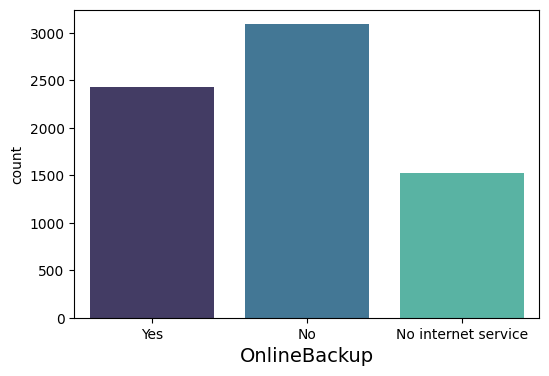

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='OnlineBackup' , data=df ,palette='mako')
plt.xlabel('OnlineBackup', fontsize=14)
plt.show()

In [24]:
df["OnlineBackup"].replace("No internet service", "No", inplace=True)

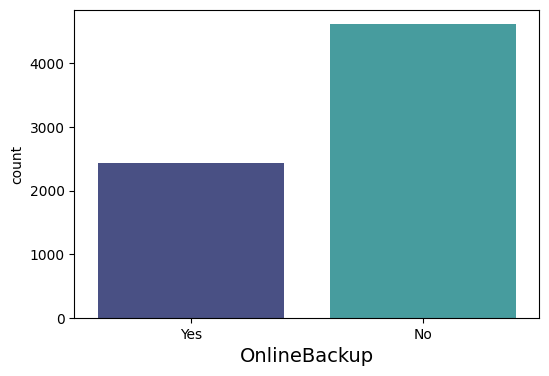

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='OnlineBackup' , data=df ,palette='mako')
plt.xlabel('OnlineBackup', fontsize=14)
plt.show()

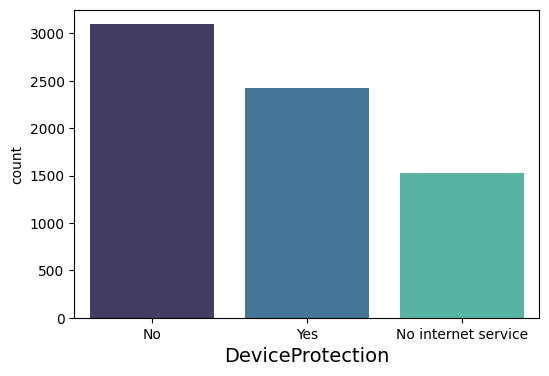

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='DeviceProtection' , data=df ,palette='mako')
plt.xlabel('DeviceProtection', fontsize=14)
plt.show()

In [27]:
df["DeviceProtection"].replace("No internet service", "No", inplace=True)

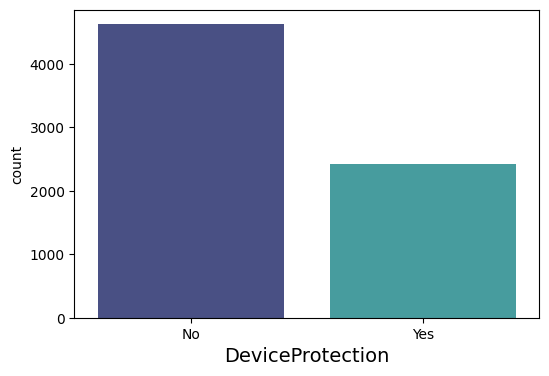

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x='DeviceProtection' , data=df ,palette='mako')
plt.xlabel('DeviceProtection', fontsize=14)
plt.show()

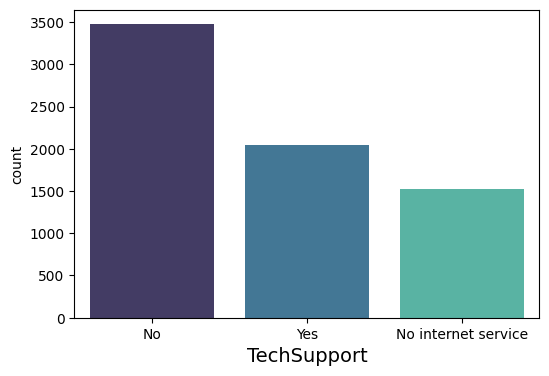

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='TechSupport' , data=df ,palette='mako')
plt.xlabel('TechSupport', fontsize=14)
plt.show()

In [30]:
df["TechSupport"].replace("No internet service", "No", inplace=True)

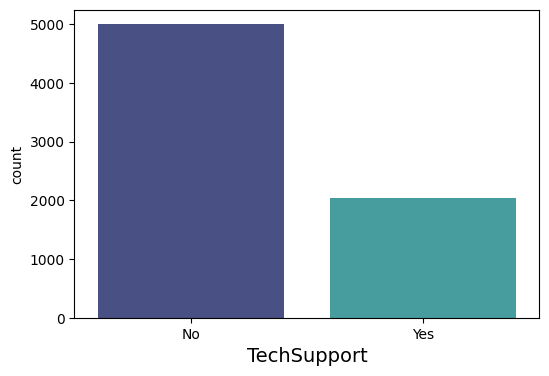

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='TechSupport' , data=df ,palette='mako')
plt.xlabel('TechSupport', fontsize=14)
plt.show()

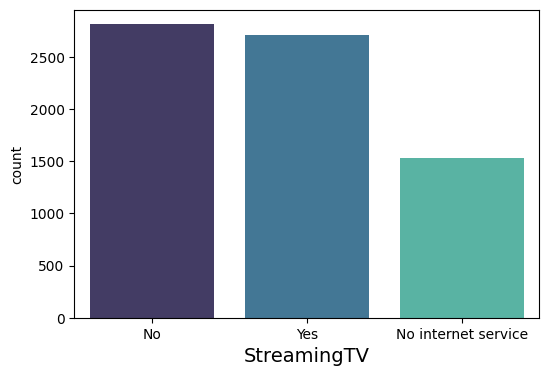

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='StreamingTV' , data=df ,palette='mako')
plt.xlabel('StreamingTV', fontsize=14)
plt.show()

In [33]:
df["StreamingTV"].replace("No internet service", "No", inplace=True)

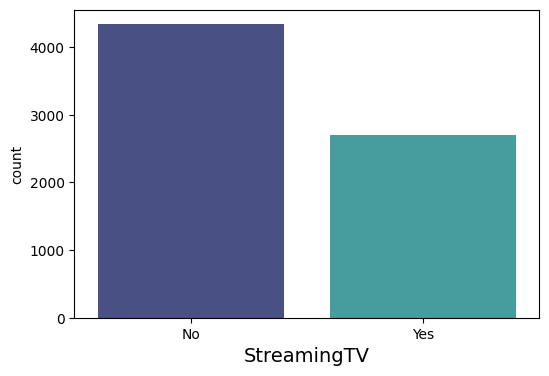

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='StreamingTV' , data=df ,palette='mako')
plt.xlabel('StreamingTV', fontsize=14)
plt.show()

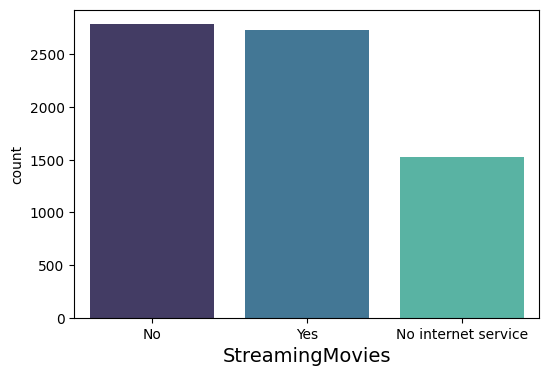

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='StreamingMovies' , data=df ,palette='mako')
plt.xlabel('StreamingMovies', fontsize=14)
plt.show()

In [36]:
df["StreamingMovies"].replace("No internet service", "No", inplace=True)

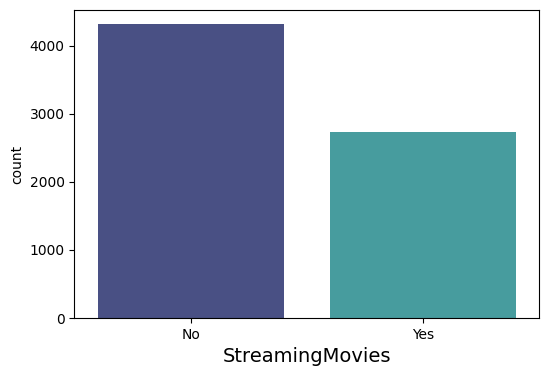

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='StreamingMovies' , data=df ,palette='mako')
plt.xlabel('StreamingMovies', fontsize=14)
plt.show()

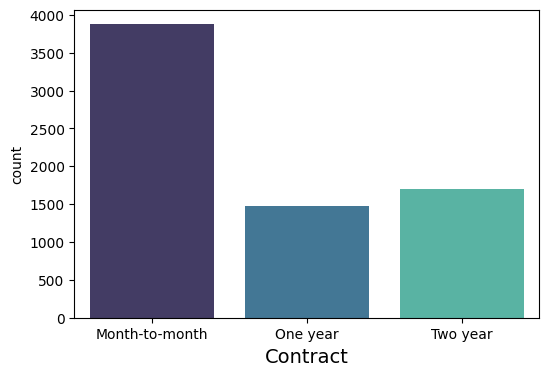

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract' , data=df ,palette='mako')
plt.xlabel('Contract', fontsize=14)
plt.show()

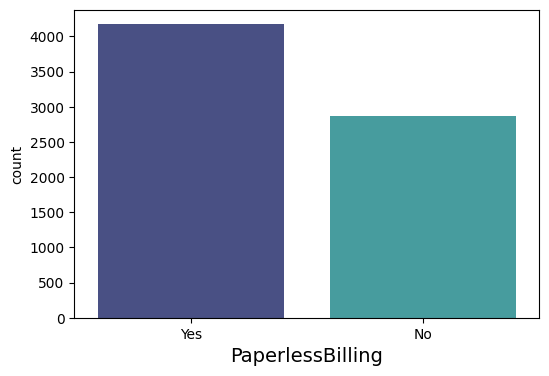

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='PaperlessBilling' , data=df ,palette='mako')
plt.xlabel('PaperlessBilling', fontsize=14)
plt.show()

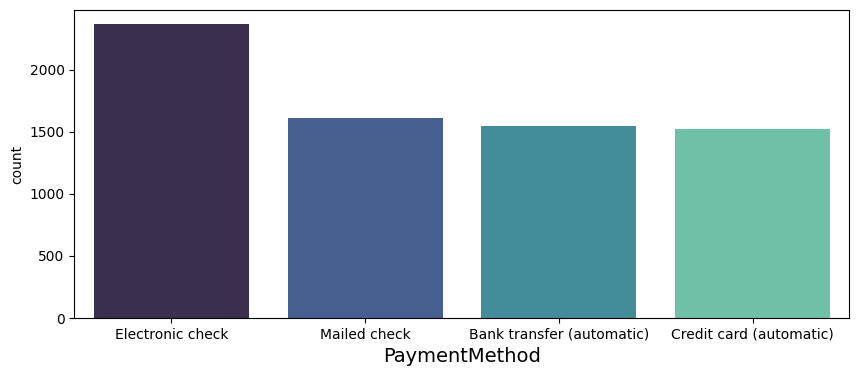

In [40]:

plt.figure(figsize=(10,4))
sns.countplot(x='PaymentMethod' , data=df ,palette='mako')
plt.xlabel('PaymentMethod', fontsize=14)
plt.show()

In [41]:
#it is qualitative data not categorical data
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [42]:
df["TotalCharges"].replace(" ", np.nan, inplace=True)

In [43]:
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [44]:
#change datatype of TotalCharges
df["TotalCharges"] = df["TotalCharges"].astype("float64")

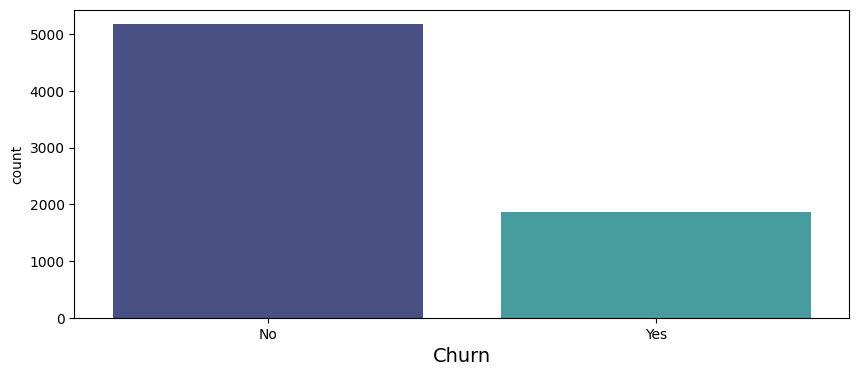

In [45]:
plt.figure(figsize=(10,4))
sns.countplot(x='Churn' , data=df ,palette='mako')
plt.xlabel('Churn', fontsize=14)
plt.show()

In [46]:
#Numerical Data

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<ipython-input-48-98b29dc24c8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["tenure"], kde=True, color="orange", bins=10)


<Axes: xlabel='tenure', ylabel='Density'>

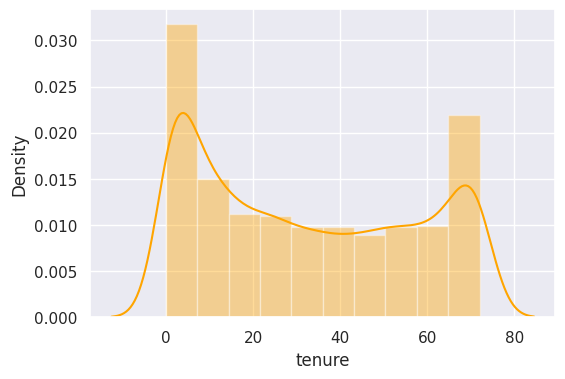

In [48]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["tenure"], kde=True, color="orange", bins=10)

<ipython-input-49-df6fe01a0c59>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MonthlyCharges"], kde=True, color="orange", bins=10)


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

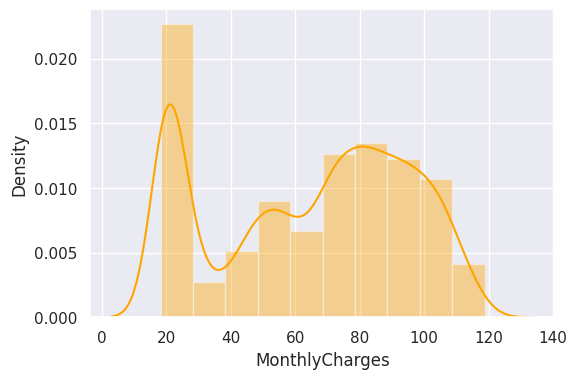

In [49]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["MonthlyCharges"], kde=True, color="orange", bins=10)

<ipython-input-50-917505c92708>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TotalCharges"], kde=True, color="orange", bins=10)


<Axes: xlabel='TotalCharges', ylabel='Density'>

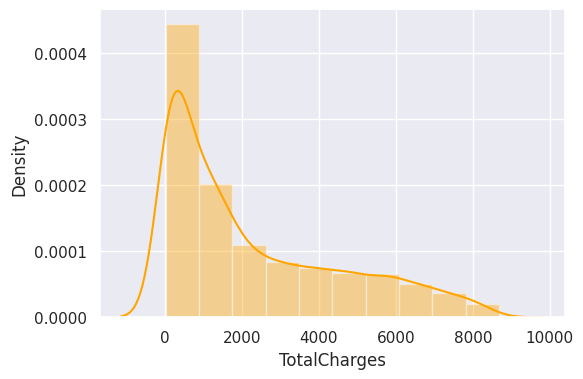

In [50]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["TotalCharges"], kde=True, color="orange", bins=10)

# **EDA (Exploratory Data Analysis)**

#### **Remove NaN Values**

In [51]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [52]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [53]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### **Remove Duplicate**

In [54]:
duplicate = df.duplicated()
print(duplicate.sum())

0


#### **Removing Outlier**

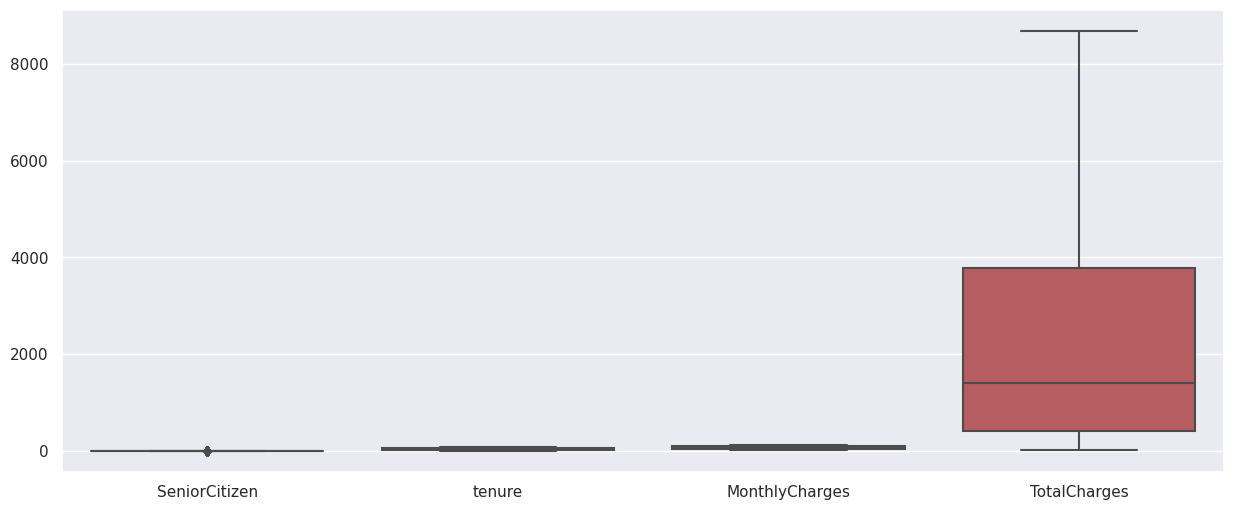

In [55]:
#Check Outliers
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15,6))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

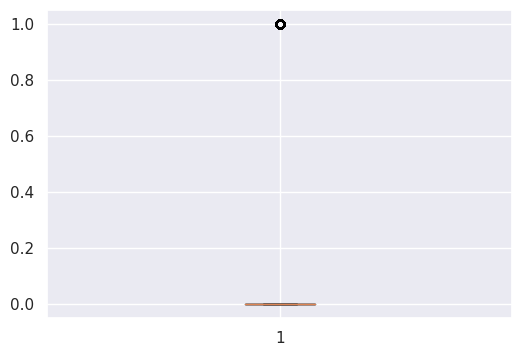

In [56]:
plt.boxplot(df["SeniorCitizen"])
plt.show()

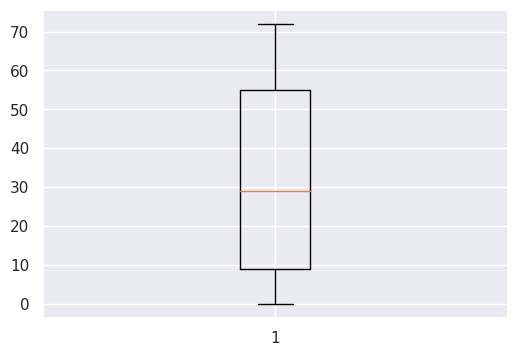

In [154]:
plt.boxplot(df["tenure"])
plt.show()

In [155]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

#### **Bivaraite Analysis**

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


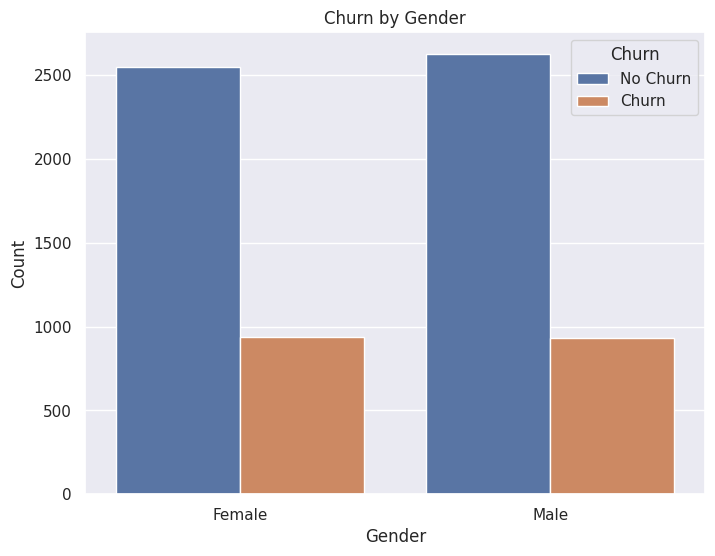

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

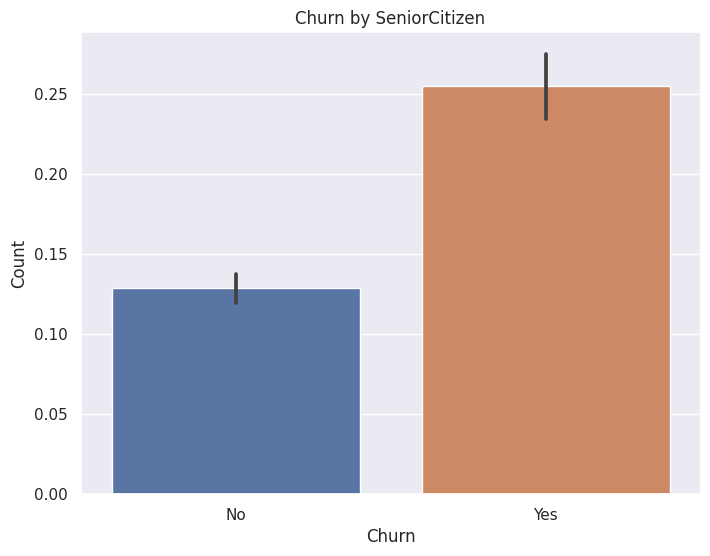

In [60]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn', y='SeniorCitizen', data=df)
plt.title('Churn by SeniorCitizen')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

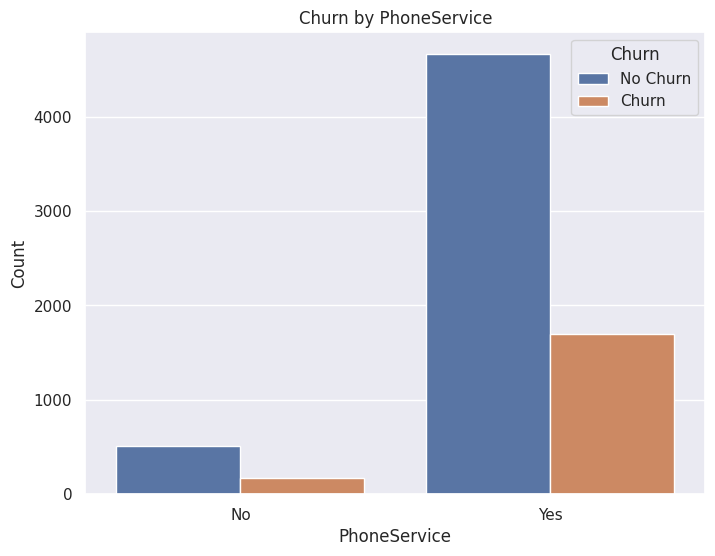

In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.title('Churn by PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

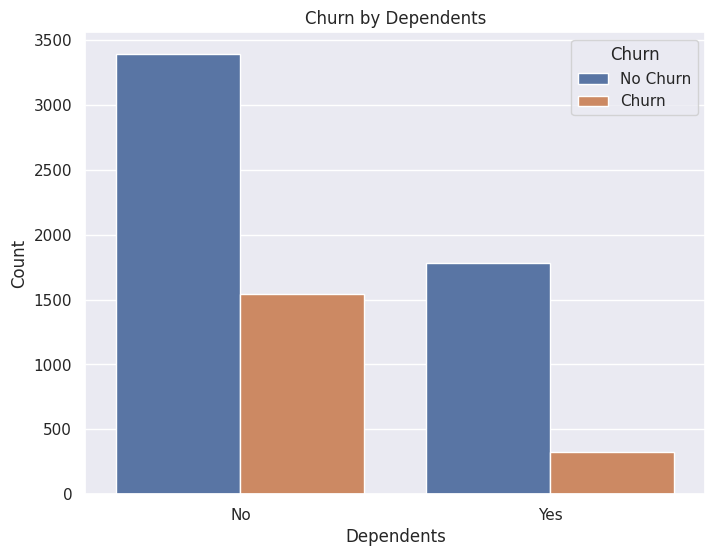

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Churn by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

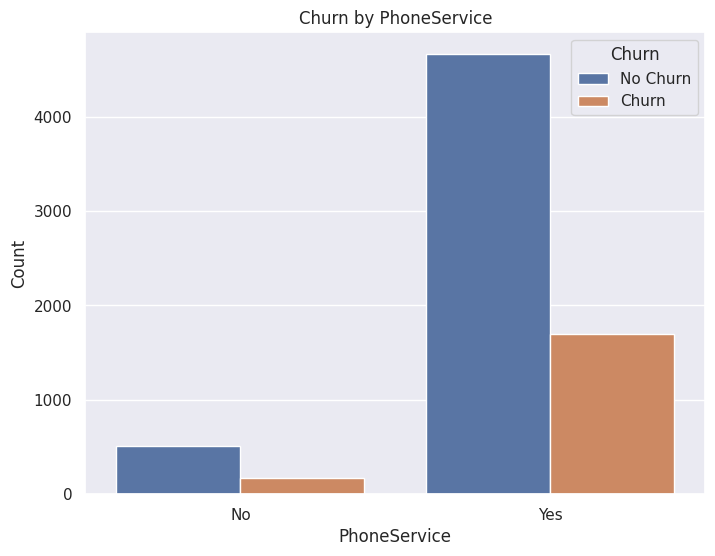

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.title('Churn by PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

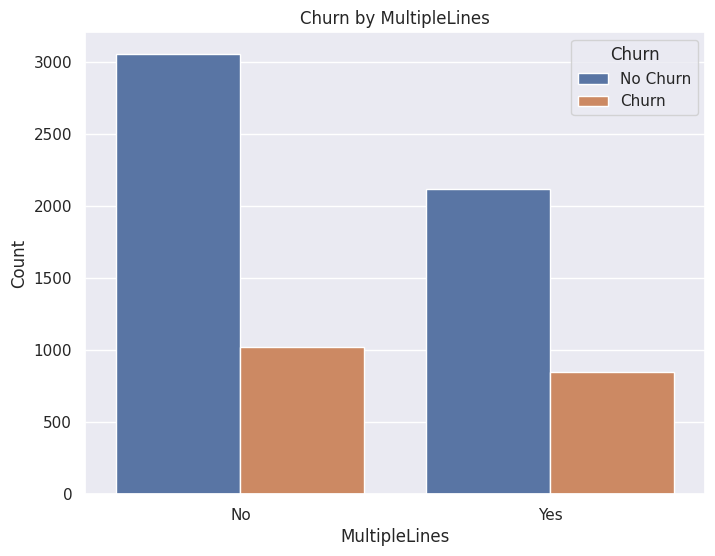

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title('Churn by MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

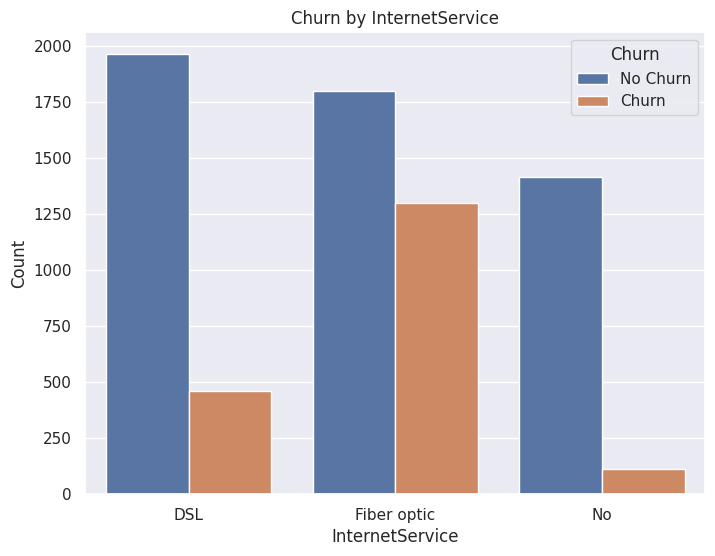

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by InternetService')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

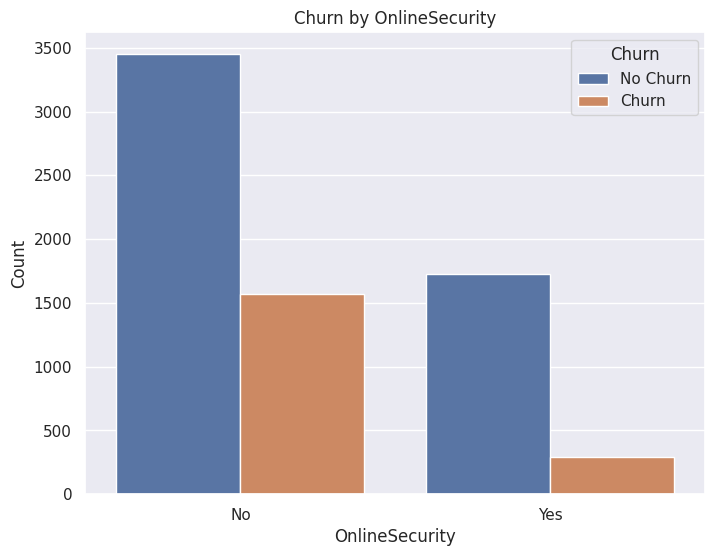

In [66]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Churn by OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

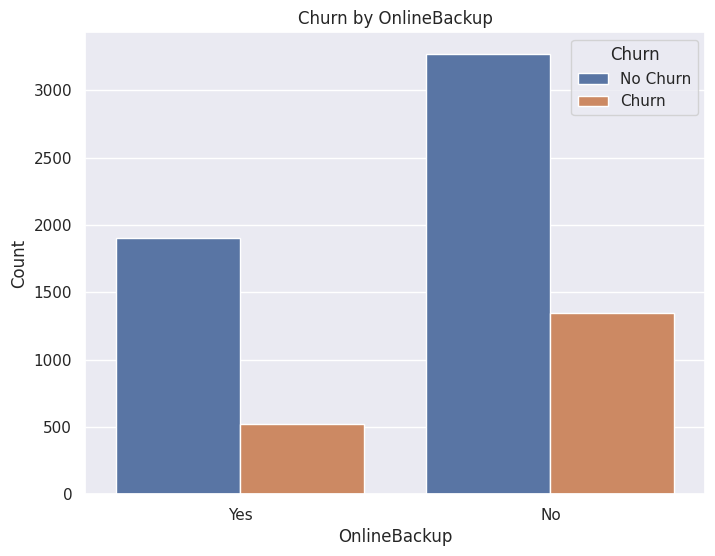

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.title('Churn by OnlineBackup')
plt.xlabel('OnlineBackup')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

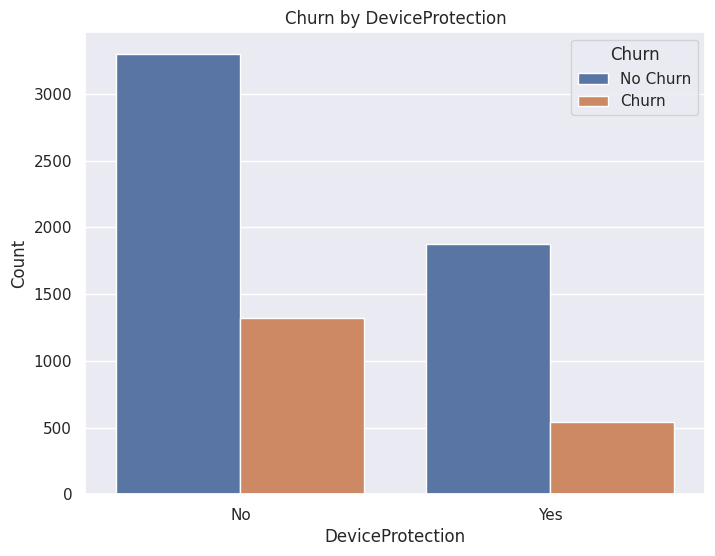

In [68]:
plt.figure(figsize=(8, 6))
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.title('Churn by DeviceProtection')
plt.xlabel('DeviceProtection')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

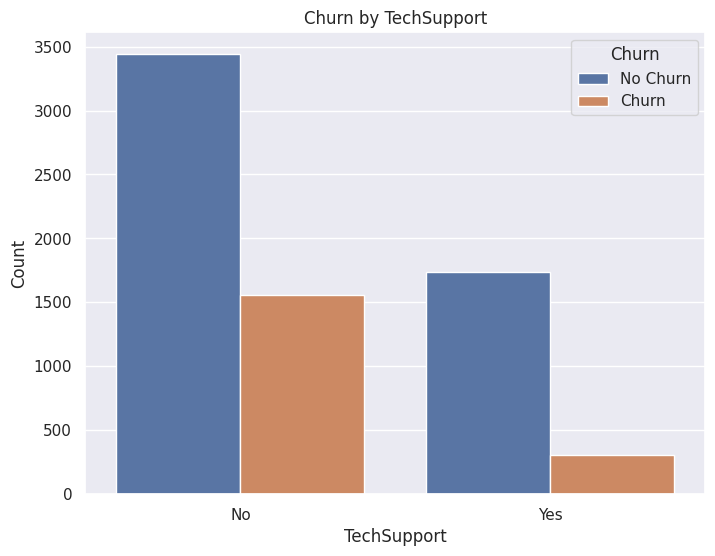

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn by TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

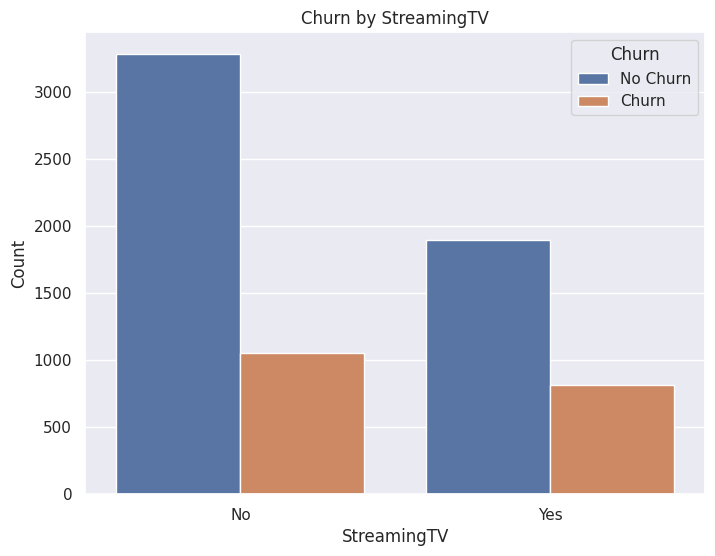

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.title('Churn by StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

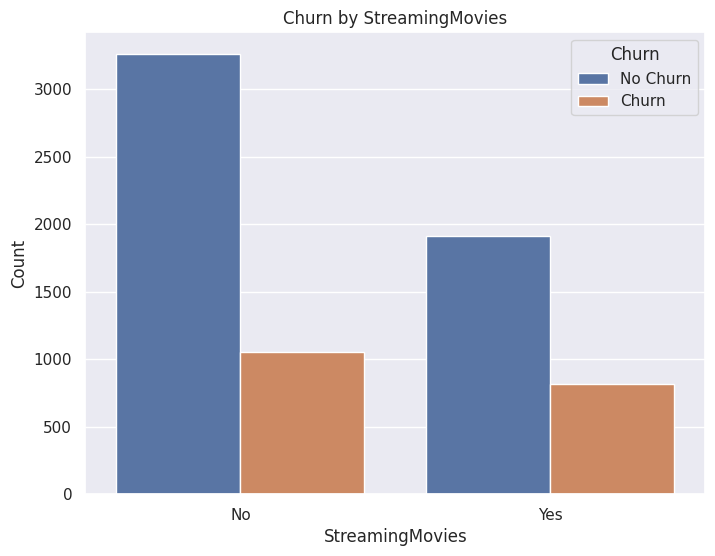

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.title('Churn by StreamingMovies')
plt.xlabel('StreamingMovies')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

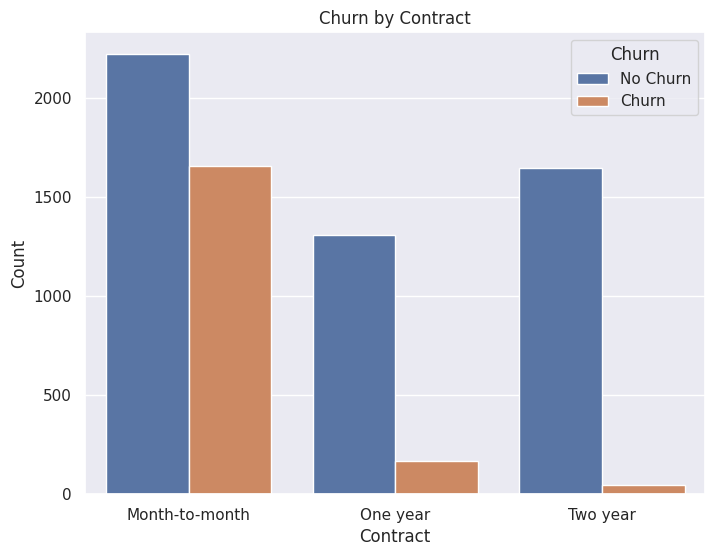

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

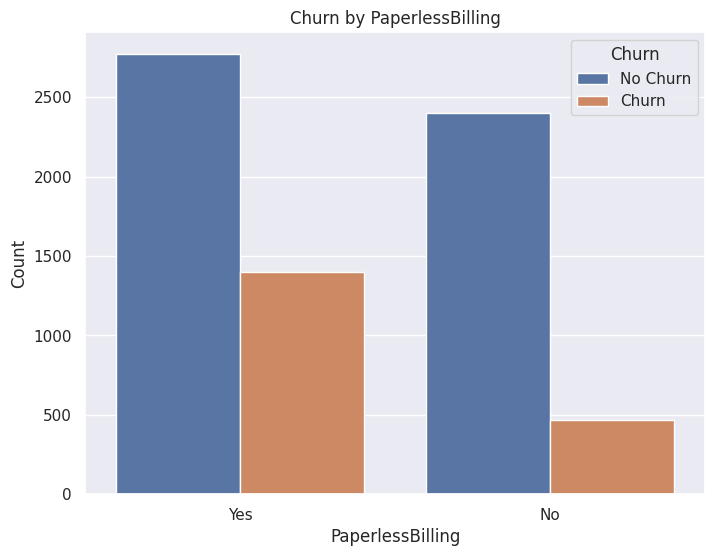

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title('Churn by PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

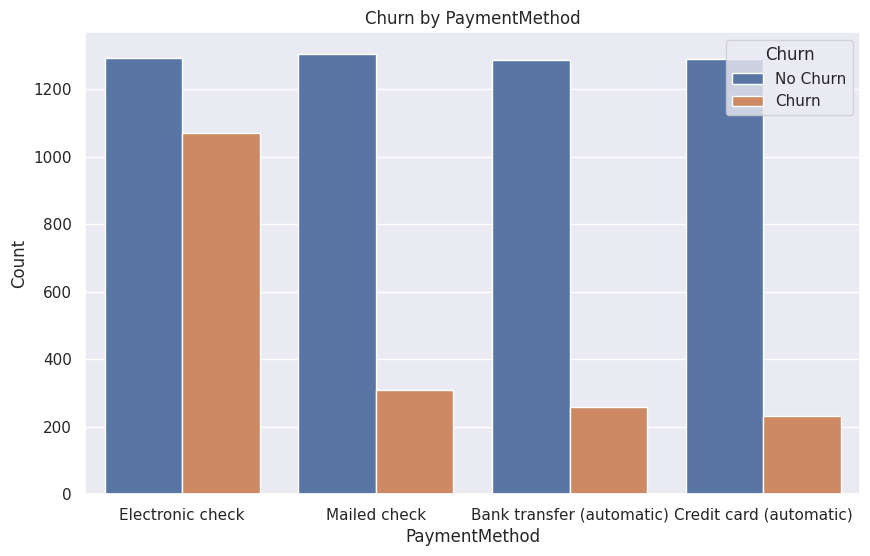

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

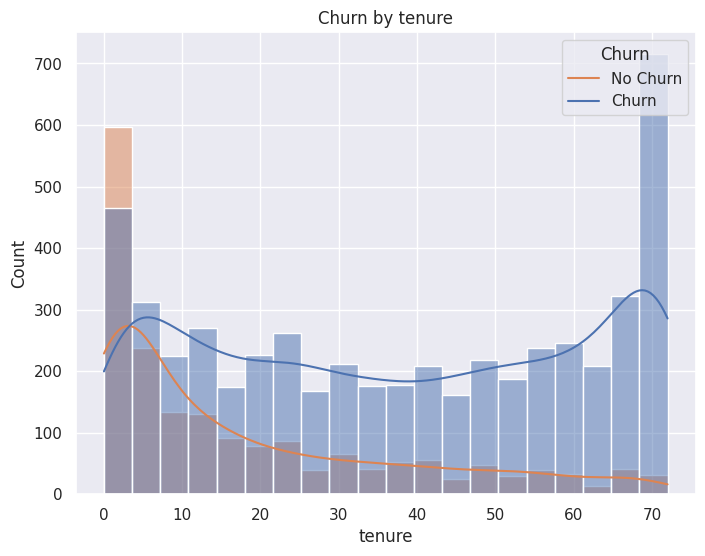

In [75]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=20)
plt.title('Churn by tenure')
plt.xlabel('tenure')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

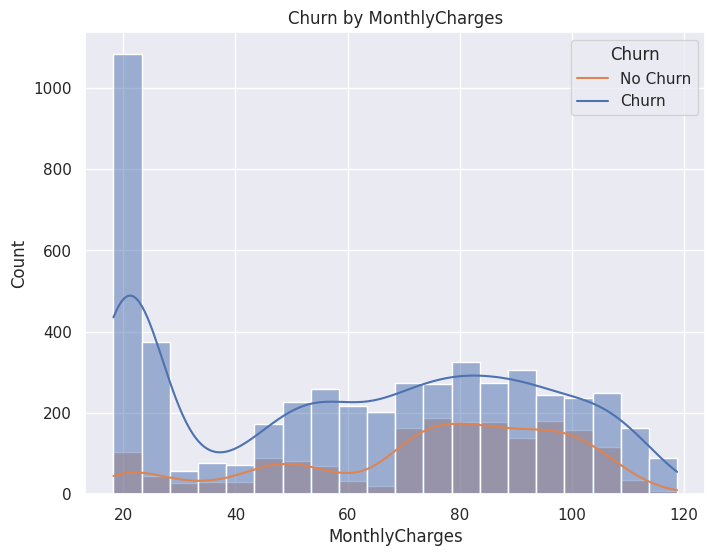

In [76]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=20)
plt.title('Churn by MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

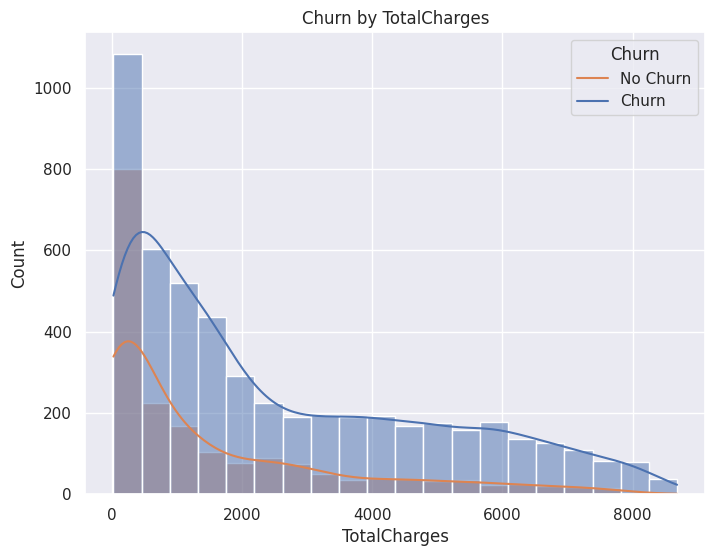

In [77]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, bins=20)
plt.title('Churn by TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

#### **Convert Categorical Data To Number**

In [78]:
le = LabelEncoder()
Label = df.select_dtypes(include=["object"])
df1 = df.copy()

for i in Label:
  df1[i] = le.fit_transform(df1[i])

df1.shape

(7043, 21)

In [79]:
df1.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [80]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [81]:
X = df1.iloc[:,1:20]
Y = df1.iloc[:,-1]

In [82]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


# **Feature Engineering**

#### **Mutual Information**

In [83]:
mi_score1 = mutual_info_classif(X,Y)
mi_score1 = pd.Series(mi_score1)
mi_score1.index = X.columns
mi_score1.sort_values(ascending=True)

OnlineBackup        0.000000
SeniorCitizen       0.000000
DeviceProtection    0.000000
gender              0.000816
StreamingTV         0.003502
PhoneService        0.004945
MultipleLines       0.006012
Dependents          0.006207
OnlineSecurity      0.009304
StreamingMovies     0.013290
TechSupport         0.015247
PaperlessBilling    0.020091
Partner             0.021357
TotalCharges        0.042862
PaymentMethod       0.045728
MonthlyCharges      0.048665
InternetService     0.055910
tenure              0.070748
Contract            0.103467
dtype: float64

<Axes: >

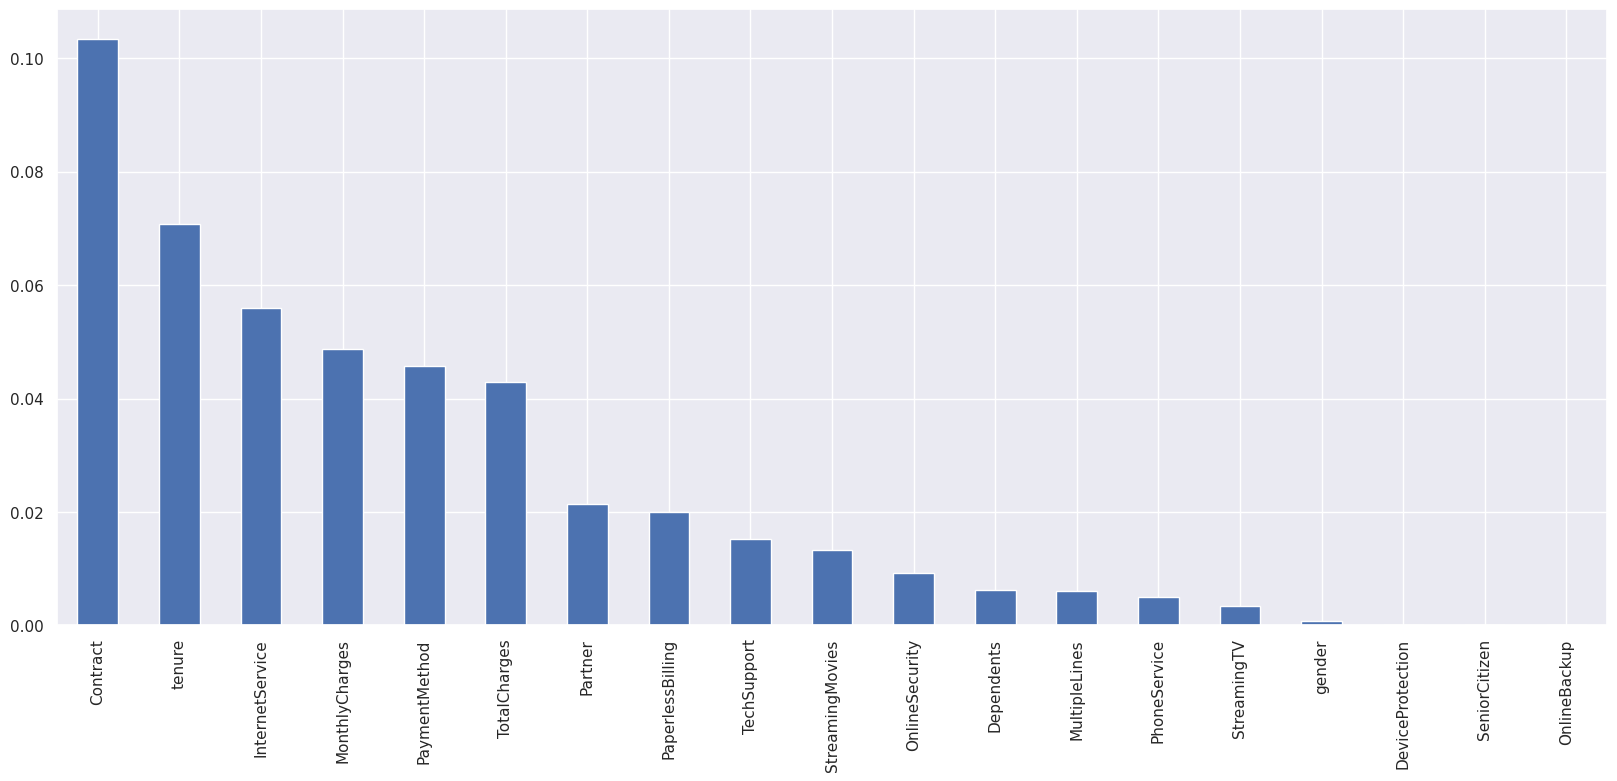

In [84]:
mi_score1.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [85]:
#select_reg =  SelectKBest(k=16, score_func=f_classif)
#X1 = select_reg.fit_transform(X, Y)

In [86]:
#X1.shape

#### **Create New Feature**

In [87]:
X["Usage_Bill_Ratio"] = X["MonthlyCharges"] / X["TotalCharges"]

In [88]:
mi_score1 = mutual_info_classif(X,Y)
mi_score1 = pd.Series(mi_score1)
mi_score1.index = X.columns
mi_score1.sort_values(ascending=True)

gender              0.000000
DeviceProtection    0.000000
MultipleLines       0.000000
OnlineBackup        0.004687
Dependents          0.005267
PhoneService        0.005289
SeniorCitizen       0.008138
TechSupport         0.008226
StreamingTV         0.010578
StreamingMovies     0.013600
Partner             0.016189
OnlineSecurity      0.016541
PaperlessBilling    0.018382
TotalCharges        0.043424
MonthlyCharges      0.043853
PaymentMethod       0.044747
InternetService     0.057391
tenure              0.071220
Usage_Bill_Ratio    0.074253
Contract            0.096073
dtype: float64

<Axes: >

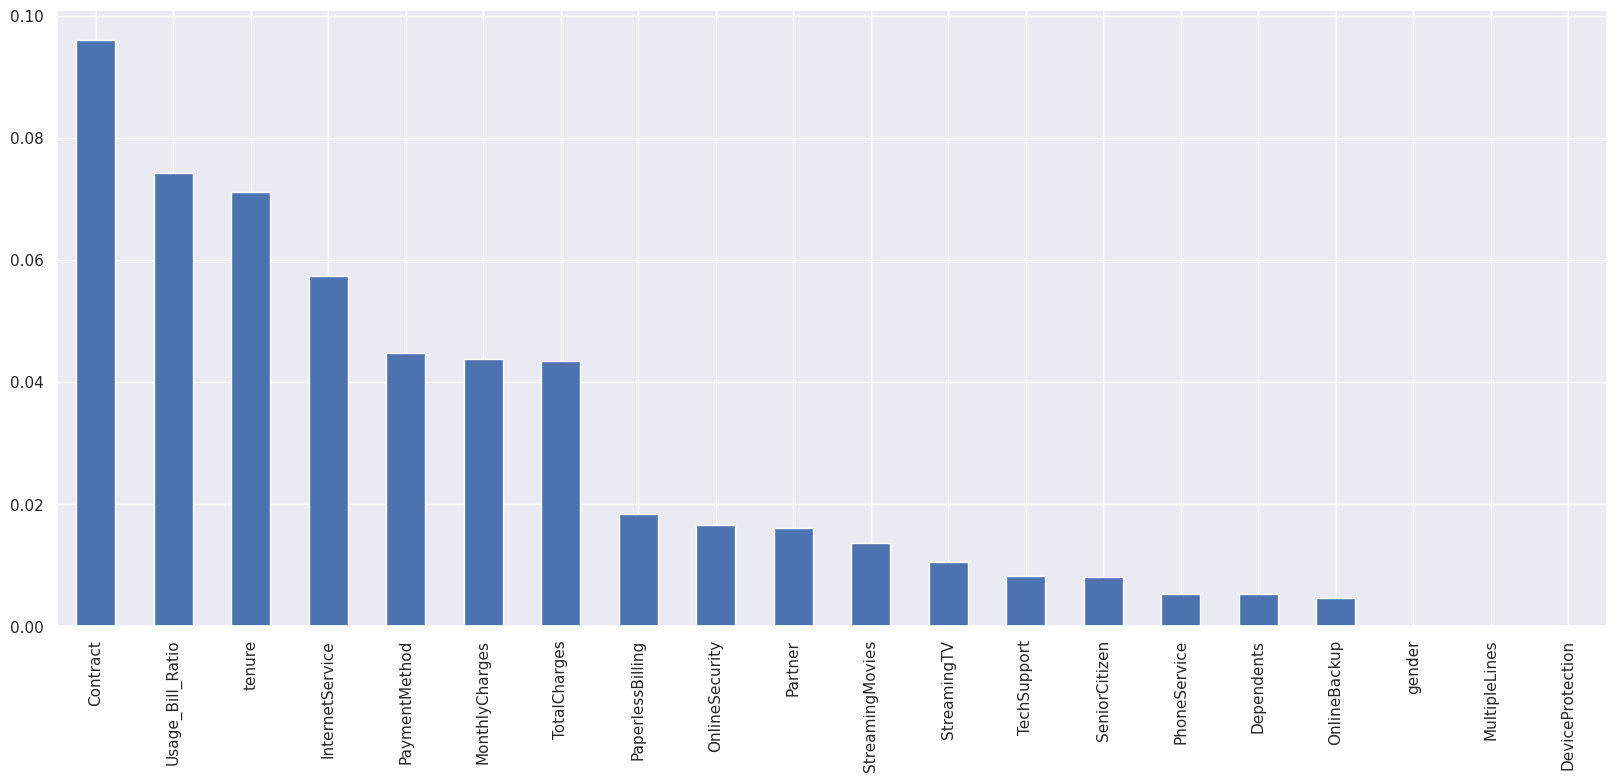

In [89]:
mi_score1.sort_values(ascending=False).plot.bar(figsize=(20, 8))

#### **Splitting Data into Train And Test**

In [90]:
train_data,test_data,train_label,test_label = train_test_split(X,Y,test_size=0.3, random_state=0)

In [91]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (4930, 20)
train_label :  (4930,)
test_data :  (2113, 20)
test_label :  (2113,)


#### **Normalize The Data**

In [92]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [93]:
train_data_sc

array([[-1.00040576, -0.43584282, -0.97515638, ...,  0.2679385 ,
        -0.72323288, -0.16025275],
       [ 0.9995944 , -0.43584282,  1.02547655, ...,  0.59379741,
        -0.48657117, -0.30971412],
       [-1.00040576, -0.43584282,  1.02547655, ..., -0.56926825,
         0.38383476, -0.50305167],
       ...,
       [ 0.9995944 , -0.43584282,  1.02547655, ..., -1.47498893,
        -0.48614983, -0.49492044],
       [ 0.9995944 ,  2.29440511, -0.97515638, ...,  0.162661  ,
        -0.98120567,  2.98765861],
       [-1.00040576, -0.43584282, -0.97515638, ..., -1.48668643,
        -0.97022858,  0.20824432]])

#### **PCA**

In [156]:
pc = PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [157]:
# Variance ratios nikalen
explained_variance = pc.explained_variance_ratio_

In [158]:
# Principal components ki importance ko dekhen
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.26601751 0.12038946 0.08823149 0.05539285 0.05289656 0.05013938
 0.0434714  0.04244379 0.03779591 0.03511224 0.03293231 0.03065361
 0.02925097 0.02788296 0.02294055 0.02261062 0.01730973 0.01524821
 0.0066832  0.00259725]


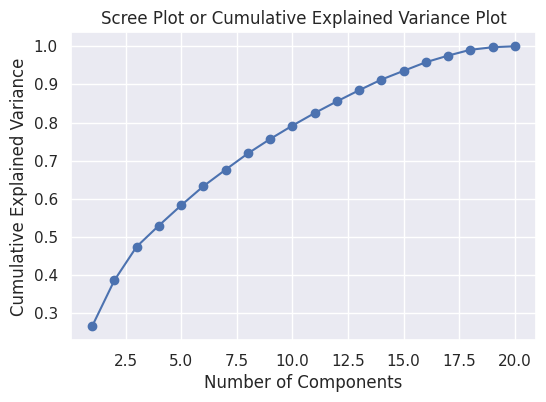

In [159]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)


# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


In [160]:

# Cumulative explained variance nikalen
cumulative_variance = np.cumsum(explained_variance)

# Kitne components select karna hai, yeh decide karen
desired_variance = 0.95  # Example: 95% variance ko capture karna hai

# Kitne components select kiye ja sakte hain
num_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"\nNumber of components selected: {num_components}")


Number of components selected: 16


In [161]:
train_data_sc_pc_select = train_data_sc_pc[:, :num_components]
test_data_sc_pc_select = test_data_sc_pc[:, :num_components]

In [138]:
print("train_data : ",train_data_sc_pc_select.shape)
print("test_data : ",test_data_sc_pc_select.shape)

train_data :  (4930, 12)
test_data :  (2113, 12)


# **Model Seletion**

#### **Logistic Regression Model**

In [139]:
model_lr = LogisticRegression()

In [140]:
model_lr.fit(train_data_sc_pc_select,train_label)

LogisticRegression()

In [141]:
y_pred = model_lr.predict(test_data_sc_pc_select)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [142]:
print("Accuracy_score : ", accuracy_score(y_pred,test_label))

Accuracy_score :  0.7733080927591103


In [143]:
confusion_matrix(y_pred,test_label)

array([[1374,  293],
       [ 186,  260]])

In [144]:
#classification_report
print(classification_report(y_pred,test_label))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1667
           1       0.47      0.58      0.52       446

    accuracy                           0.77      2113
   macro avg       0.68      0.70      0.69      2113
weighted avg       0.79      0.77      0.78      2113



In [145]:
print("Corss _Val_Score Train Data : ",cross_val_score(model_lr,train_data_sc_pc_select,train_label,cv=5).mean())
print("Corss _Val_Score Test Data : ",cross_val_score(model_lr,test_data_sc_pc_select,test_label,cv=5).mean())

Corss _Val_Score Train Data :  0.7963488843813388
Corss _Val_Score Test Data :  0.7894020369063225


In [146]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters ke possible values ka grid tayyar karein
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

model_lr = LogisticRegression()

# GridSearchCV object tayyar karein
grid_search = GridSearchCV(model_lr, param_grid, cv=5)

# GridSearchCV object ko train karein
grid_search.fit(train_data_sc_pc_select, train_label)

# Sabse behtar hyperparameters ko dekhein
best_params = grid_search.best_params_
print("Sabse behtar hyperparameters:", best_params)

# Sabse behtar score dekhein
best_score = grid_search.best_score_
print("Sabse behtar score:", best_score)

Sabse behtar hyperparameters: {'C': 0.01}
Sabse behtar score: 0.8006085192697767


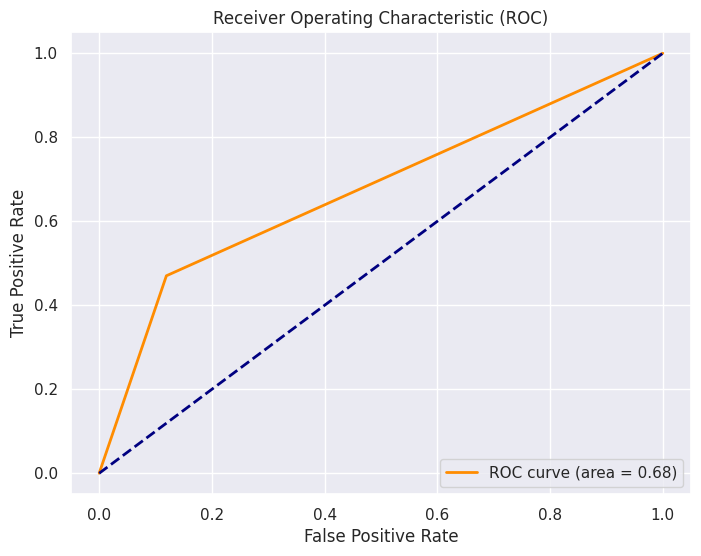

In [147]:
from sklearn.metrics._plot.roc_curve import auc
fpr, tpr, thresholds = roc_curve(test_label, y_pred)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### **Random Forest Model**

In [148]:
model_rf = RandomForestClassifier()

In [149]:
model_rf.fit(train_data_sc_pc_select,train_label)

RandomForestClassifier()

In [150]:
y_pred_2 = model_rf.predict(test_data_sc_pc_select)
y_pred_2

array([0, 0, 0, ..., 0, 0, 0])

In [151]:
print("Train Data Score : ",model_rf.score(train_data_sc_pc_select,train_label))
print("Test Data Score : ",accuracy_score(y_pred_2,test_label))

Train Data Score :  0.9971602434077079
Test Data Score :  0.7799337434926644


In [152]:
print(confusion_matrix(y_pred_2,test_label))

[[1454  359]
 [ 106  194]]


In [153]:
#classification Report
print(classification_report(y_pred_2,test_label))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1813
           1       0.35      0.65      0.45       300

    accuracy                           0.78      2113
   macro avg       0.64      0.72      0.66      2113
weighted avg       0.85      0.78      0.80      2113



In [115]:
print("Corss _Val_Score Train Data : ",cross_val_score(model_rf,train_data_sc_pc_select,train_label,cv=5).mean())
print("Corss _Val_Score Test Data : ",cross_val_score(model_rf,test_data_sc_pc_select,test_label,cv=5).mean())

Corss _Val_Score Train Data :  0.7748478701825559
Corss _Val_Score Test Data :  0.7699909246748009


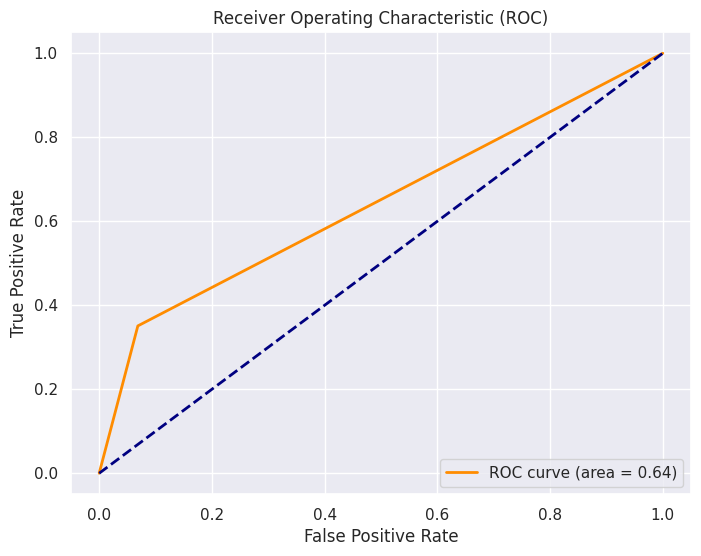

In [116]:
from sklearn.metrics._plot.roc_curve import auc
fpr, tpr, thresholds = roc_curve(test_label, y_pred_2)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameters ke possible values ka grid tayyar karein
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest Classifier model tayyar karein
rf_classifier = RandomForestClassifier(random_state=42)

# GridSearchCV object tayyar karein
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# GridSearchCV object ko train karein
grid_search.fit(X, Y)

# Sabse behtar hyperparameters ko dekhein
best_params = grid_search.best_params_
print("Sabse behtar hyperparameters:", best_params)

# Sabse behtar score dekhein
best_score = grid_search.best_score_
print("Sabse behtar score:", best_score)


Sabse behtar hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Sabse behtar score: 0.8026414002516292


In [118]:
model_rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 50)
model_rf.fit(train_data_sc_pc_select,train_label)
y_pred_2 = model_rf.predict(test_data_sc_pc_select)
print("Train Data Score : ",model_rf.score(train_data_sc_pc_select,train_label))
print("Test Data Accuracy Score : ",model_rf.score(test_data_sc_pc_select,test_label))

Train Data Score :  0.9006085192697769
Test Data Accuracy Score :  0.7785139611926172


In [119]:
print("Corss _Val_Score Train Data : ",cross_val_score(model_rf,train_data_sc_pc_select,train_label,cv=5).mean())
print("Corss _Val_Score Test Data : ",cross_val_score(model_rf,test_data_sc_pc_select,test_label,cv=5).mean())

Corss _Val_Score Train Data :  0.7864097363083163
Corss _Val_Score Test Data :  0.7761475804734855


#### **XGBOOST**

In [120]:
model_xg = xgb.XGBClassifier()

In [121]:
model_xg.fit(train_data_sc_pc_select,train_label)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [122]:
y_pred_3 = model_xg.predict(test_data_sc_pc_select)

In [123]:
print("Train Data Score : ",model_xg.score(train_data_sc_pc_select,train_label))
print("Test Data Accuracy Score : ",accuracy_score(y_pred_3,test_label))

Train Data Score :  0.9862068965517241
Test Data Accuracy Score :  0.7718883104590629


In [124]:
print("Corss _Val_Score Train Data : ",cross_val_score(model_xg,train_data_sc_pc_select,train_label,cv=5).mean())
print("Corss _Val_Score Test Data : ",cross_val_score(model_xg,test_data_sc_pc_select,test_label,cv=5).mean())

Corss _Val_Score Train Data :  0.7709939148073023
Corss _Val_Score Test Data :  0.7591050160778908


In [126]:
print(classification_report(y_pred_3,test_label))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85      1746
           1       0.40      0.60      0.48       367

    accuracy                           0.77      2113
   macro avg       0.65      0.70      0.67      2113
weighted avg       0.82      0.77      0.79      2113



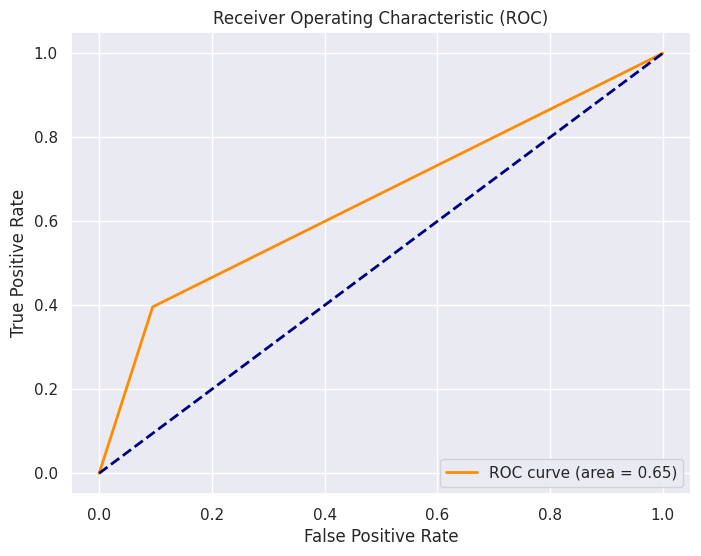

In [125]:
from sklearn.metrics._plot.roc_curve import auc
fpr, tpr, thresholds = roc_curve(test_label, y_pred_3)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()